In [1]:
#FASTAI LESSON ONE RANDOM FOREST

In [2]:
##Make the use of the TAB for the autocompletion

In [3]:
##These lines will automatically update the jupyter notebook if new module is added

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
##This will help us in plotting using matplotlib

In [6]:
%matplotlib inline

In [7]:
##Import fastai libraries with 

In [8]:
from fastai.imports import *  
from fastai.structured import *

In [9]:
##Import other python libraries necessary for machine learning

In [10]:
from pandas_summary import DataFrameSummary  ##for dataframe handling
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, RandomTreesEmbedding  ##for implementing the 
##random forest model. For this we can use anything like classifier or may be regressor. This entirely depends on the problem 
##which are going to solve

In [11]:
from IPython.display import display  ##importing IPython module
from sklearn import metrics  ##sklearn again for matrix operations

In [12]:
display  ##if you want to know what it does then type the name and press SHIFT + ENTER

<function IPython.core.display.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, **kwargs)>

In [13]:
##Display is the IPython library. To know about the implementation of this function put ?? before the name
??display

In [14]:
##This will show the complete implementation of the display function 

In [15]:
##Today we are going to use Kaggle Competetion dataset which is known as Blue Book for Bulldozers

In [16]:
##The goal is to predict the sale price of bulldozers sold at auctions. So for this we are going to use the regressor which is 
##continous multivalued prediction.

In [17]:
##This is the path to the dataset

In [18]:
path = "data/bulldozer/"

In [19]:
path

'data/bulldozer/'

In [20]:
##Now we are going to use pandas to load the data using the dataframes

In [21]:
data = pd.read_csv('data/bulldozer/Train.csv', low_memory = False, parse_dates=["saledate"])

In [22]:
##Parse_date use to tell pandas to treat it as a date datatype only not as a string datatype
##And since the coloumns are too much so i transpose it to show all the coloumns together

In [23]:
data.head().transpose()

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [24]:
##Since this project going to be evaluated using the root mean square log error. 
##so it necessary to convert the output data into log

In [25]:
data.SalePrice = np.log(data.SalePrice)

In [26]:
data.SalePrice

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
5         10.184900
6          9.952278
7         10.203592
8          9.975808
9         11.082143
10        10.085809
11        10.021271
12        10.491274
13        10.325482
14        10.239960
15         9.852194
16         9.510445
17         9.159047
18         9.433484
19         9.350102
20        10.621327
21        10.448715
22        10.165852
23        11.198215
24        10.404263
25         9.433484
26         9.648595
27        10.878047
28        10.736397
29        11.396392
            ...    
401095     9.259131
401096     9.210340
401097     9.047821
401098     9.259131
401099     9.305651
401100     9.259131
401101     9.210340
401102     9.259131
401103     9.433484
401104     9.259131
401105     9.210340
401106     9.259131
401107     9.433484
401108     9.259131
401109     9.259131
401110     9.259131
401111     9.210340
401112     9.259131
401113     9.259131


In [27]:
##So we have replace the saleprice with the log value of sale price

In [28]:
##So now we are going to make the use of RandomForest Regressor Model for the further processing

In [29]:
RandomForestRegressor

sklearn.ensemble.forest.RandomForestRegressor

In [30]:
##So it is sklearn model. We can do two things with RandomForest model and these are classifier and regressor. 
##So firstly we are going to create the instance of the RandomForest Regressor Model and we are going to fit it with the data.

In [31]:
reg = RandomForestRegressor(n_jobs=-1)

In [32]:
##For fit function put the instance dot fit then put the input name comma output name
##In our case Input - everything except SalePrice column and Output - SalePrice

In [33]:
reg.fit(data.drop('SalePrice',axis=1),data.SalePrice)

C:\ProgramData\Anaconda2\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Low'

In [34]:
##Why it doesn't work because the data is mix of continous and categorical value like strings like 
##values in columns - state, Product Group Descriptions, SaleDate

In [35]:
##Feature engineering for the SaleDate column. For this we are going to make the use of fastai library in order to get insight 
##into that particular date. Like this will tell us that whether on that data holiday was there or not using add_datapart function

In [36]:
add_datepart

<function fastai.structured.add_datepart(df, fldname, drop=True, time=False, errors='raise')>

In [37]:
##This is fastai library for the feature engineering for the date datatype

In [38]:
ft = data.saledate

In [39]:
ft.dt.week ##this will tell us what is the week number on that date

0         46
1         13
2          9
3         20
4         30
5         51
6         35
7         46
8         35
9         32
10        34
11        34
12        42
13         4
14         1
15        46
16        24
17         4
18        10
19        46
20        20
21        42
22        43
23        42
24        21
25        10
26        10
27         8
28        32
29        22
          ..
401095    50
401096    37
401097    43
401098    33
401099    50
401100    33
401101    50
401102    33
401103    37
401104    33
401105    43
401106    33
401107    37
401108    33
401109    33
401110    37
401111    43
401112    43
401113    43
401114    46
401115    43
401116    43
401117    43
401118    43
401119    43
401120    44
401121    44
401122    44
401123    43
401124    43
Name: saledate, Length: 401125, dtype: int64

In [40]:
data.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [41]:
##before using add_datepart function and get insight into the source code use ??add_datepart

In [42]:
add_datepart(data,'saledate')

In [43]:
data.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [44]:
##Now as we can see that 13 more columns are add to the dataframes.
##This will help us in getting the proper insight into the date.

In [45]:
data.head().transpose()

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,11.0974,10.9508,9.21034,10.5584,9.30565
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
fiModelDesc,521D,950FII,226,PC120-6E,S175


In [46]:
##Now still we haven't converted all the categorical values to the continous values.
##Till now, we are only done with the saledate column only. So we are going to make the use train_cats() function in order to 
##convert strings to pandas categories.

In [47]:
train_cats

<function fastai.structured.train_cats(df)>

In [48]:
##This is fastai library function. Make the ??train_cats in order to see the source code. 
##train_cats() is apply different for test set, validation set and for training set which can be a huge problem.
##So make the use of apply_cats function by fastai library so that the mapping done in training set will be the same for the 
##test and validation sets. And make the use ??apply_cats for the source code.

In [49]:
apply_cats

<function fastai.structured.apply_cats(df, trn)>

In [50]:
##train_cats doesn't make changes visible but in the backend it does the proper work. 
##For example lets see the state columns 

In [51]:
train_cats(data)

In [52]:
data.head().transpose()

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,11.0974,10.9508,9.21034,10.5584,9.30565
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
fiModelDesc,521D,950FII,226,PC120-6E,S175


In [53]:
##So as we can see the change is not visible in the dataframes but it works in the backend part

In [54]:
data.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [55]:
##So right now it will map High = 0, Low = 1, Medium = 2. So to make it in order do as follows

In [56]:
data.UsageBand.cat.set_categories(['Low','Medium','High'], ordered=True, inplace=True)

In [57]:
data.UsageBand.cat.codes

0         0
1         0
2         2
3         2
4         1
5         0
6         2
7         2
8         0
9         1
10        1
11        0
12       -1
13        1
14        0
15        1
16        0
17       -1
18        0
19        1
20        1
21        1
22        0
23        2
24        1
25        1
26        0
27       -1
28        0
29        1
         ..
401095   -1
401096   -1
401097   -1
401098   -1
401099   -1
401100   -1
401101   -1
401102   -1
401103   -1
401104   -1
401105   -1
401106   -1
401107   -1
401108   -1
401109   -1
401110   -1
401111   -1
401112   -1
401113   -1
401114   -1
401115   -1
401116   -1
401117   -1
401118   -1
401119   -1
401120   -1
401121   -1
401122   -1
401123   -1
401124   -1
Length: 401125, dtype: int8

In [58]:
##This is how mapping will be done
##Now we are going to deal with the missing and null values
##display_all function so that we can see all the entry instead of dots.

In [59]:
def display_all(df):
    with pd.option_context("display.max_rows", 100):
        with pd.option_context("display.max_columns", 100):
            display(df)

In [60]:
display_all(data.isnull().sum().sort_index()/len(data))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [61]:
##These are the number of all null or missing values.
##So now we are going to save the properly formatted data

In [62]:
os.makedirs('tmp',exist_ok=True)
data.to_feather('tmp/bulldozers-raw')

In [63]:
##Now we are going to replace the string with the numeric codes
##Handle the missing continous value
##Split the target or dependent column into seperate variable
##For this we are going to make the use of proc_df() function by fastai library

In [64]:
proc_df

<function fastai.structured.proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None, preproc_fn=None, max_n_cat=None, subset=None, mapper=None)>

In [65]:
##proc_df function
##It first drop the dependent variable from the dataframe
##Then fix the missing values. For numeric column it first check the for the missing value then it create new columns with same 
##column name + '_na'. then it put 1 if the value is missing and 0 if not. Then in original columns it replace the missing 
##values with median. For the non-numeric column, pandas do it with -1 and then numericalize function of this proc_df will 
##increase the value of all the number in the column by 1. So the missing will become 0.


In [66]:
df, y, nas = proc_df(data, 'SalePrice')

In [67]:
##nas is the dictionary of column with missing values as a key and there value as a median of that row

In [68]:
nas

{'auctioneerID': 2.0, 'MachineHoursCurrentMeter': 0.0}

In [69]:
df.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleI

In [70]:
##As you can see that the Sale Price is removed from the dataframe 
##And for missing values the auctioneerID_na, etc are also added.
##Y is the SalePrice column

In [71]:
y  

array([11.09741, 10.95081,  9.21034, ...,  9.3501 ,  9.10498,  8.95545])

In [72]:
##nas will give the list of columns with the missing values

In [73]:
nas

{'auctioneerID': 2.0, 'MachineHoursCurrentMeter': 0.0}

In [74]:
##Now as we can see everything in our dataframe is now either number or boolean values.

In [75]:
df.head().transpose()

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,1,1,3,3,2
fiModelDesc,950,1725,331,3674,4208
fiBaseModel,296,527,110,1375,1529


In [76]:
 ##Now we are going to apply the RandomForest Regression Model

In [77]:
m = RandomForestRegressor(n_jobs=-1)
##Here we are creating the instance of the RandomForestRegressor.
##n_jobs = -1 means it will tell RandomForestRegressor to create a seperate process for each cpu. 
##Because in today's world everyone is using the more than one cpu.

In [78]:
m.fit(df,y)

C:\ProgramData\Anaconda2\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [79]:
##For fit function, we make the use of instance to call the fit function then we will pass the input and output variable 
##seperated by the comma.

In [80]:
m.score(df,y)

0.9830469152689121

In [81]:
##similarly for score function also

In [82]:
##Actually the root mean square log error id sum((log(actual)-log(predicted))^2).
##That is why, we have converted the SalePrice column into log(SalePrice) column.
##So as we all know that the score is 0.9830 which is r^2 value. So what is r^2?? It is Coefficient of determination.
##r^2 = 1-(y/z), where y = sum((actual_data - predicted_data)^2), z= sum((actual_data - mean(actual_data))^2).
##So when will the r^2 = 1. ,means m.score = 1. This will happen when our predicted_data will be same as actual_data, 
##which makes the y = 0, hence y/z=0, and r^2 = 1. But in real life r^2 values lies between anything less then 1.
##r^2 < 1, means your model is worst and u need to deploy new model.

In [83]:
##In order to check for the overfitting, we need to divide the dataset into training, testing and validation dataset.
##Validation dataset must be the representative and are used to tune or set the hyperparameters.
##Now we are going to split the dataset into two: - Training set, Validation set.

In [84]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(data, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

In [85]:
##Now below, we have created a rmse function which will calculate the error rate and print score for score printing

In [86]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [87]:
k = RandomForestRegressor(n_jobs=-1)
%time k.fit(X_train,y_train)
print_score(k)

C:\ProgramData\Anaconda2\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 29.6 s
[0.0903028942165437, 0.2458419883087055, 0.9829573091718727, 0.8920655473643868]


In [88]:
##Now here, we can draw a lot conclusion
##0.090 rmse on training set is good means less amount of log error
##0.24 rmse is quite large but still good because now we are in top 120 kaggle competetion
##0.98 score or r^2 value is good
##0.88 score or r^2 value is not good due to the overfitting of tha data. 
##That is why, it is important to have a seperate validation dataset for checking the overfitting, underfitting problem.

In [89]:
##Now as we have seen that wall time for this is 35.6 second approx. which is quite large.
##So to speed things up, we are going to make the use of proc_df function and we are going to pass the second parameter.
##This second parameter is the sampling amount which is here 30000. This will randomly sample the 30000 entry from the dataset.
##And use it as X_train and y_train. But the point here is this, we no need to change the validation set.
##We should never interfare with the validation set.

In [90]:
df_trn, y_trn, nas = proc_df(data, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

X_train.shape, y_train.shape

((20000, 66), (20000,))

In [91]:
##Deploying RandomForest Regressor Again 
##%time is used to check the time it has taken to trained the model on training set

In [92]:
l = RandomForestRegressor(n_jobs=-1)
%time l.fit(X_train,y_train)
print_score(l)

C:\ProgramData\Anaconda2\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 1.16 s
[0.11245947816683632, 0.3559451976998377, 0.9722678860130826, 0.773736630728849]


In [93]:
##As we can see the Wall Time has been reduced to 1.45s which quite good
##So now on time dataset we are going to make the tree
##Forest is made up of trees. So firstly, we are going to deploy the tree then we are gonna proceed
##In scikit, we call tree as a estimator. So we are going to deploy one tree (n_estimator=1)

In [94]:
n = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
%time n.fit(X_train,y_train)
print_score(n)

Wall time: 175 ms
[0.5240705499834231, 0.5798490109755321, 0.39775894348514207, 0.3995486639935068]


In [95]:
##So as we can see that the r^2 value of the validation set goes down. So this is defintely not a good model.
##But we can draw this model too.

In [96]:
#draw_tree(n.estimators_[0], df_trn, precision=3)

In [97]:
##So the Coupler_System parameter can be treated as a basis for the making the first decision and it is the best parameter 
##for the first split. So as we have seen that 0.39 is not a good r^2 value for the validation set. 
##So now, we are going to remove the max_depth parameter as it restrict the tree up to the level 3 only.

In [98]:
o = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
%time o.fit(X_train,y_train)
print_score(o)

Wall time: 477 ms
[3.7682219008410604e-17, 0.4729690392944382, 1.0, 0.6005031132752019]


In [99]:
##So as we can see that r^2 value of the training set is 1. This is because in the end, leaf node contains only single value not
##the range of continous value. That's why the training set has the 1 r^2. But the r^2 value of the validation set is not that 
##good. So here, we are further going to increase the accuracy by creating the forest. For this, we are going to make the use
##statistical technique called Bagging.

In [100]:
##In this, we are going to divide the dataset into subsets and for random subsets we are going to deploy the models. 
##In this way, our forest will have the trees with relativily less depth. This also have the less rmse value.
##But we are overfitting the data terribly. But since the errors are random, so the average of those error will also 
##be zero.

In [131]:
p = RandomForestRegressor(n_jobs=-1) ##By default it create n_estimator (tree) = 10
%time p.fit(X_train,y_train)
print_score(p)

C:\ProgramData\Anaconda2\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 28.9 s
[0.09061451571908098, 0.2515652009209438, 0.9828394827728794, 0.8869816132708932]


In [132]:
##Basically, what this algo does? This take all the parameter one by one and split it to make tree. 
##Parameter with maximum accuracy and minimum error are chosen for the further splitting.
##Now as we know that our RandomForest has 10 trees(estimator), now we are going to look into the individual tree predictions

In [133]:
preds = np.stack([t.predict(X_valid) for t in p.estimators_])
preds.shape

(10, 12000)

In [134]:
preds

array([[9.21034, 9.39266, 9.15905, ..., 9.74097, 9.30565, 9.30565],
       [9.39266, 9.21034, 9.5819 , ..., 9.3501 , 8.95545, 8.95545],
       [8.9872 , 9.15905, 9.10498, ..., 9.10498, 9.30565, 9.30565],
       ...,
       [9.15905, 9.54681, 9.6486 , ..., 9.39266, 8.9872 , 8.9872 ],
       [9.13238, 9.04782, 8.9872 , ..., 9.3501 , 9.30565, 9.30565],
       [9.16952, 9.15905, 9.04782, ..., 9.5819 , 9.39266, 9.39266]])

In [135]:
##So for all the rows, we are having the each tree prediction
##preds[:0] returns the predicts of first row by all the 10 trees and then we are going to mean and compare it y_valid

In [136]:
preds[0], np.mean(preds[0]), y_valid[0]

(array([9.21034, 9.39266, 9.15905, ..., 9.74097, 9.30565, 9.30565]),
 10.023145890443448,
 9.104979856318357)

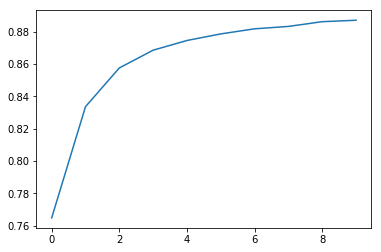

In [137]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)])

In [138]:
#This matches with the r2 value of the y_valid. So now we are going to add more and more trees.

In [139]:
q = RandomForestRegressor(n_jobs=-1, n_estimators=20) ##total trees = 20
%time q.fit(X_train,y_train)
print_score(q)

Wall time: 52 s
[0.08252568053362877, 0.23842915344425758, 0.9857664557847977, 0.8984764752131761]


In [140]:
r = RandomForestRegressor(n_jobs=-1, n_estimators=40) ##total trees = 40
%time r.fit(X_train,y_train)
print_score(r)

Wall time: 1min 47s
[0.07846427314211805, 0.23590978419792696, 0.9871329574220539, 0.9006106430681386]


In [141]:
s = RandomForestRegressor(n_jobs=-1, n_estimators=80) ##total trees = 80
%time s.fit(X_train,y_train)
print_score(s)

Wall time: 3min 32s
[0.07615990501583016, 0.2354880256827073, 0.9878776278195656, 0.9009657011431059]


In [142]:
t = RandomForestRegressor(n_jobs=-1, n_estimators=200) ##total trees = 200
%time t.fit(X_train,y_train)
print_score(t)

Wall time: 8min 44s
[0.07483114752764802, 0.23401951307170754, 0.9882969344825756, 0.9021970134618358]


In [143]:
##After a point, increase in the number of tree doesn't increase the score of y_valid.
##So now what happen in RandomForest, not all the rows are used by each tree. So we can use those unused rows as validation set.
##Now to predict the value of that row, we are going to take the average of the values predicted by the tree which haven't
##used that row as a train set and hence we can also calculate the rmse. This is Out-of Bagging. And oob_score does this only.
##The oob_score value will be sightly less than score of the y_valid.

In [144]:
u = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True) ##total trees = 40
%time u.fit(X_train,y_train)
print_score(u)

Wall time: 2min 2s
[0.07839038587256127, 0.2378451968395717, 0.9871571789684614, 0.8989731655856688, 0.9083347904957656]


In [145]:
##Till now, we are we have taken the sample 30000 and applying the randomly selected row from it to the model.
##So for now we are going to randomly select the rows from the whole dataset inspite of taking it from the 30000 selected rows.

In [146]:
df_trn, y_trn, nas = proc_df(data, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [147]:
##Taking the sample of 20000 randomly selected rows from the entire dataset for each tree in forest.

In [148]:
set_rf_samples(20000)

In [149]:
#Now applying the model with 10 trees (estimators)

In [150]:
v = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=10)
%time v.fit(X_train, y_train)
print_score(v)

Wall time: 6.64 s
[0.24036625518150642, 0.27560191010836327, 0.8792514787586138, 0.8643523043752368, 0.8665912298085952]


In [151]:
w = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=40)
%time w.fit(X_train, y_train)
print_score(w)

Wall time: 16.8 s
[0.2275117589499073, 0.2634396274735948, 0.891821109665106, 0.8760603740437566, 0.880240493681576]


In [152]:
##So it is clearly visible the score increases on the training and validation set as well as oob_score also increases.
##Subsampling and using the Forest with 40 trees is the best combination.
#Now we are going to tune the Tree parameter

In [153]:
reset_rf_samples()

In [154]:
##For removing the subsampling

In [155]:
x = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=40)
%time x.fit(X_train, y_train)
print_score(x)

Wall time: 1min 43s
[0.07831218897205063, 0.23589576663913675, 0.9871827884329969, 0.9006224539793936, 0.908279402645271]


In [156]:
##Here this is going to take more time because it is not subsampling the dataset.Model is deployed on the complete training set.
##oob_score may be higher due to random prediction. r^2 of validation set is low because it is predicting the values of 
##validation set which is not used for training purpose. But for oob_score it is randomly taking the values from the training 
##set and validation set to predict the values.
##Now we are going to change a node to a leaf node if number of sample under that will be less than or equal to 5.

In [157]:
y = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
%time y.fit(X_train, y_train)
print_score(y)

Wall time: 1min 25s
[0.14074138346989637, 0.2328576810405692, 0.9586020860353509, 0.9031657239006846, 0.9069163465233641]


In [158]:
##So if at anypoint the data under a particular sub tree is less then 6 then it will take the average value of all the samples
##under it and make it as a leaf node. For the maximum efficiency use 1,3,5,10,25,100 as min_sample_leaf.
##Now suppose one column is more helpful in the prediction of target value then the other. So every tree in the Forest going to
##use that as a base criteria for the further splitting. This means more number of trees are similar. So to reduce this use
##max_feature parameter. It works best with 1, 0.5, log2, sqrt. So now this make each tree to use different-different columns
##for the further splitting purpose. It is also sampling but column-wise.

In [159]:
z = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time z.fit(X_train, y_train)
print_score(z)

Wall time: 55.4 s
[0.11930178851985881, 0.22797263629384487, 0.970253988943514, 0.9071860155804082, 0.9115892214324529]


In [160]:
##Now as we can see that rmse value of target value is keep on reducing and now compare it with the kaggle one. We are in TOP20.